<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_1_6)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.6_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,39.161297,67.801232,31.697672,-0.035340,148.624861,148.646793,-0.021932
1,0.0,1.0,94.610160,54.617527,83.801033,0.001625,243.030345,243.035143,-0.004798
2,0.0,2.0,97.936707,52.208070,38.147672,-0.003774,198.288675,198.292704,-0.004029
3,0.0,3.0,63.723646,34.350812,65.444236,0.049662,173.568356,173.509902,0.058454
4,0.0,4.0,20.507467,81.972146,95.319171,-0.042198,207.756586,207.792400,-0.035814
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,25.590803,23.720255,29.283427,0.102060,88.696544,88.579468,0.117076
119996,999.0,116.0,47.125883,74.237347,56.936271,-0.007821,188.291681,188.293971,-0.002290
119997,999.0,117.0,62.145374,90.851110,27.543284,0.006511,190.546278,190.527998,0.018281
119998,999.0,118.0,68.261596,30.414227,56.612033,-0.063483,165.224374,165.281244,-0.056870


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    39.161297  67.801232  31.697672 -0.035340  148.624861   
      1.0    94.610160  54.617527  83.801033  0.001625  243.030345   
      2.0    97.936707  52.208070  38.147672 -0.003774  198.288675   
      3.0    63.723646  34.350812  65.444236  0.049662  173.568356   
      4.0    20.507467  81.972146  95.319171 -0.042198  207.756586   
...                ...        ...        ...       ...         ...   
999.0 115.0  25.590803  23.720255  29.283427  0.102060   88.696544   
      116.0  47.125883  74.237347  56.936271 -0.007821  188.291681   
      117.0  62.145374  90.851110  27.543284  0.006511  190.546278   
      118.0  68.261596  30.414227  56.612033 -0.063483  165.224374   
      119.0  20.388387  42.676208  23.449360 -0.056772   96.457183   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    148.646793 -0.021932  
      1.0    243.035143 -0.004798  
      2.0    198.292704 -0.004029  
      3.0    173.509902  0.058454  
      4.0    207.792400 -0.035814  
...                 ...       ...  
999.0 115.0   88.579468  0.117076  
      116.0  188.293971 -0.002290  
      117.0  190.527998  0.018281  
      118.0  165.281244 -0.056870  
      119.0   96.498038 -0.040855  

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    39.161297  67.801232  31.697672 -0.035340  148.624861   
      1.0    94.610160  54.617527  83.801033  0.001625  243.030345   
      2.0    97.936707  52.208070  38.147672 -0.003774  198.288675   
      3.0    63.723646  34.350812  65.444236  0.049662  173.568356   
      4.0    20.507467  81.972146  95.319171 -0.042198  207.756586   
...                ...        ...        ...       ...         ...   
999.0 115.0  25.590803  23.720255  29.283427  0.102060   88.696544   
      116.0  47.125883  74.237347  56.936271 -0.007821  188.291681   
      117.0  62.145374  90.851110  27.543284  0.006511  190.546278   
      118.0  68.261596  30.414227  56.612033 -0.063483  165.224374   
      119.0  20.388387  42.676208  23.449360 -0.056772   96.457183   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    148.646793 -0.021932  
      1.0    243.035143 -0.004798  
      2.0    198.292704 -0.004029  
      3.0    173.509902  0.058454  
      4.0    207.792400 -0.035814  
...                 ...       ...  
999.0 115.0   88.579468  0.117076  
      116.0  188.293971 -0.002290  
      117.0  190.527998  0.018281  
      118.0  165.281244 -0.056870  
      119.0   96.498038 -0.040855  

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,39.161297,67.801232,31.697672,-0.035340,148.624861,148.646793,-0.021932
1,0.0,1.0,94.610160,54.617527,83.801033,0.001625,243.030345,243.035143,-0.004798
2,0.0,2.0,97.936707,52.208070,38.147672,-0.003774,198.288675,198.292704,-0.004029
3,0.0,3.0,63.723646,34.350812,65.444236,0.049662,173.568356,173.509902,0.058454
4,0.0,4.0,20.507467,81.972146,95.319171,-0.042198,207.756586,207.792400,-0.035814
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,25.590803,23.720255,29.283427,0.102060,88.696544,88.579468,0.117076
119996,999.0,116.0,47.125883,74.237347,56.936271,-0.007821,188.291681,188.293971,-0.002290
119997,999.0,117.0,62.145374,90.851110,27.543284,0.006511,190.546278,190.527998,0.018281
119998,999.0,118.0,68.261596,30.414227,56.612033,-0.063483,165.224374,165.281244,-0.056870


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    39.161297  67.801232  31.697672 -0.035340  148.624861   
      1.0    94.610160  54.617527  83.801033  0.001625  243.030345   
      2.0    97.936707  52.208070  38.147672 -0.003774  198.288675   
      3.0    63.723646  34.350812  65.444236  0.049662  173.568356   
      4.0    20.507467  81.972146  95.319171 -0.042198  207.756586   
...                ...        ...        ...       ...         ...   
999.0 115.0  25.590803  23.720255  29.283427  0.102060   88.696544   
      116.0  47.125883  74.237347  56.936271 -0.007821  188.291681   
      117.0  62.145374  90.851110  27.543284  0.006511  190.546278   
      118.0  68.261596  30.414227  56.612033 -0.063483  165.224374   
      119.0  20.388387  42.676208  23.449360 -0.056772   96.457183   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    148.646793 -0.021932  
      1.0    243.035143 -0.004798  
      2.0    198.292704 -0.004029  
      3.0    173.509902  0.058454  
      4.0    207.792400 -0.035814  
...                 ...       ...  
999.0 115.0   88.579468  0.117076  
      116.0  188.293971 -0.002290  
      117.0  190.527998  0.018281  
      118.0  165.281244 -0.056870  
      119.0   96.498038 -0.040855  

[120000 rows x 7 columns]

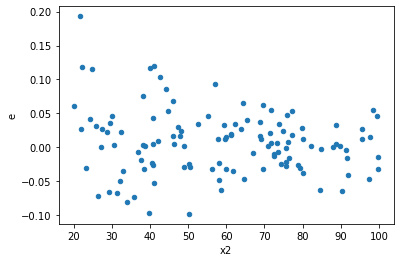

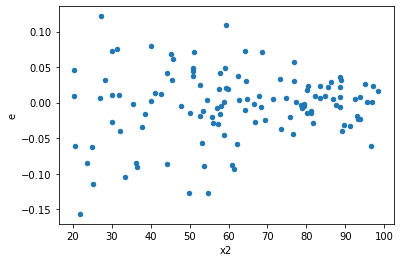

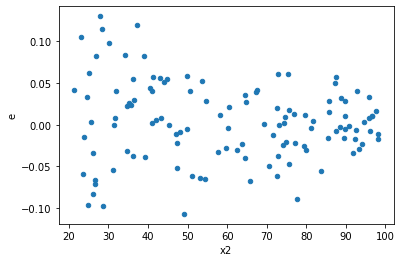

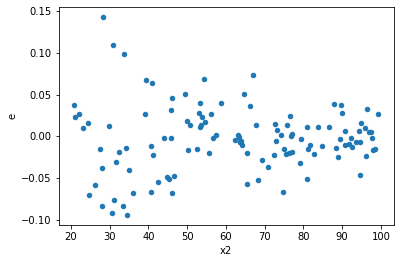

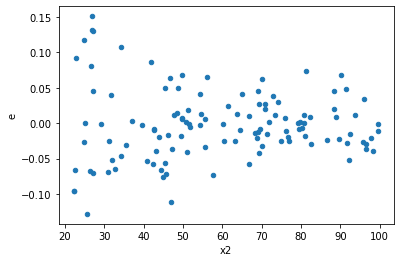

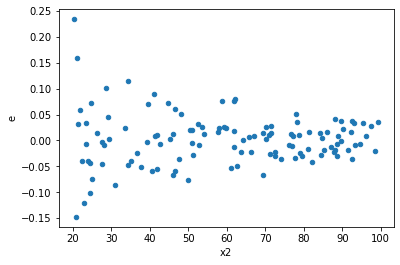

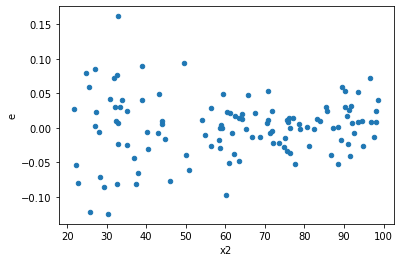

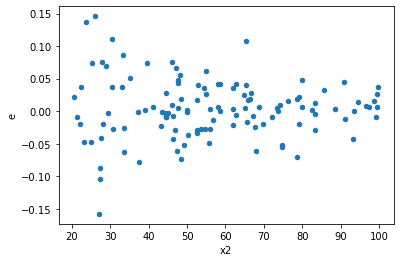

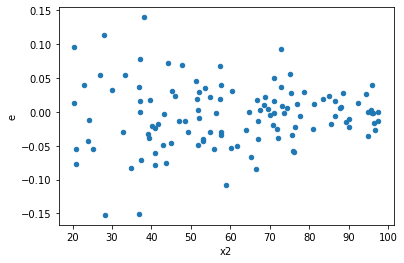

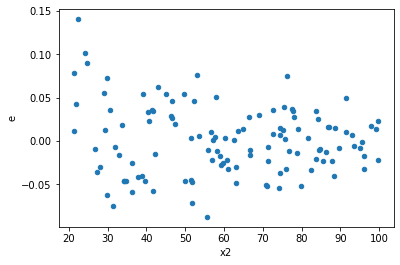

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,59.0,55.0,0.0856969437653194,0.10508866589908636,0.0014524905722935492,0.0019107030163470248,1.31546672508169,0.30605151269186837,0.8469742436540658,0.15302575634593418,Reject005=1 : Homoscedasticity
1.0,55.0,59.0,0.03949032968610687,0.19395889885458148,0.0007180059942928522,0.003287438963636974,4.578567574320459,3.434170436911188e-08,0.9999999828291478,1.717085218455594e-08,Reject005=0 : Heteroscedasticity
3.0,57.0,57.0,0.12605306847978995,0.12711805388614167,0.0022114573417507007,0.0022301412962480996,1.0084487067169055,0.974774961673158,0.512612519163421,0.487387480836579,Reject005=1 : Homoscedasticity
5.0,57.0,57.0,0.07102882285356593,0.18575615190679198,0.0012461196991853671,0.0032588798580138944,2.615222165370101,0.00038926555881135805,0.9998053672205943,0.00019463277940567902,Reject005=0 : Heteroscedasticity
8.0,54.0,60.0,0.04993449194014012,0.18374181664193295,0.0009247128137062986,0.0030623636106988828,3.311691549319799,9.952296033954866e-06,0.999995023851983,4.976148016977433e-06,Reject005=0 : Heteroscedasticity
9.0,51.0,63.0,0.04902774407407707,0.08640435101435968,0.0009613283151779817,0.0013714976351485665,1.4266693422991972,0.17951158588062532,0.9102442070596873,0.08975579294031266,Reject005=1 : Homoscedasticity
10.0,65.0,49.0,0.09066232811411032,0.12517250647558611,0.0013948050479093896,0.002554540948481349,1.8314680982193428,0.028367079483601954,0.985816460258199,0.014183539741800977,Reject005=0 : Heteroscedasticity
17.0,58.0,56.0,0.09129224616055774,0.147439133215224,0.0015740042441475472,0.0026328416645575716,1.6727030275470902,0.05506931471101395,0.972465342644493,0.027534657355506975,Reject005=1 : Homoscedasticity
18.0,57.0,57.0,0.12147420141329536,0.13317184521783312,0.002131126340584129,0.0023363481617163706,1.0962973509472889,0.7297329930088963,0.6351335034955519,0.36486649650444813,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,59.0,55.0,0.0856969437653194,0.10508866589908636,0.0014524905722935492,0.0019107030163470248,1.31546672508169,0.30605151269186837,Reject005=1 : Homoscedasticity
1.0,55.0,59.0,0.03949032968610687,0.19395889885458148,0.0007180059942928522,0.003287438963636974,4.578567574320459,3.434170436911188e-08,Reject005=0 : Heteroscedasticity
2.0,59.0,55.0,0.22575901230923381,0.05220849037897784,0.003826423937444641,0.0009492452796177788,0.24807634886679678,3.6572269898076416e-07,Reject005=0 : Heteroscedasticity
3.0,57.0,57.0,0.12605306847978995,0.12711805388614167,0.0022114573417507007,0.0022301412962480996,1.0084487067169055,0.974774961673158,Reject005=1 : Homoscedasticity
4.0,62.0,52.0,0.26507336635785844,0.05175980661488078,0.004275376876739652,0.000995380896440015,0.23281711183297593,8.685917305219564e-08,Reject005=0 : Heteroscedasticity
5.0,57.0,57.0,0.07102882285356593,0.18575615190679198,0.0012461196991853671,0.0032588798580138944,2.615222165370101,0.00038926555881135805,Reject005=0 : Heteroscedasticity
6.0,56.0,58.0,0.10320162968084759,0.08970061899385567,0.00184288624430085,0.0015465623964457875,0.8392066527321218,0.5115471914633677,Reject005=1 : Homoscedasticity
7.0,62.0,52.0,0.12301828551159796,0.07750355905955515,0.0019841658953483545,0.0014904530588375992,0.7511736101965025,0.27940906189298914,Reject005=1 : Homoscedasticity
8.0,54.0,60.0,0.04993449194014012,0.18374181664193295,0.0009247128137062986,0.0030623636106988828,3.311691549319799,9.952296033954866e-06,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      502
Reject005=0 : Heteroscedasticity    498
Name: Result_test, dtype: int64